In [1]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import tensorflow as tf

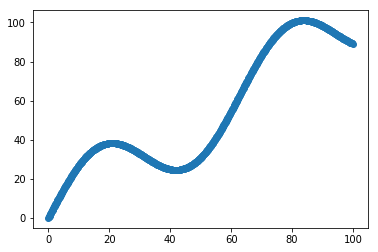

In [2]:
#Synthetic Data Generation
X_data = np.arange(100,step = 0.1)
y_data = X_data + 20*np.sin(X_data/10)
plt.scatter(X_data,y_data)
plt.show()

In [3]:
# Data Size and Batch Size
n_samples = 1000
n_batch = 100
X_data = np.reshape(X_data,(n_samples,1))
y_data = np.reshape(y_data,(n_samples,1))

In [4]:
# Tensor Flow Placeholders

X = tf.placeholder(tf.float32, shape = (n_batch,1))
y = tf.placeholder(tf.float32, shape = (n_batch,1))

In [5]:
# Constructive Phase - Code the Graph

with tf.variable_scope("lr") :
    W = tf.get_variable("weights",(1,1),initializer= tf.random_normal_initializer())
    b = tf.get_variable("bias",(1,1),initializer= tf.constant_initializer(0.0))
    y_pred = tf.matmul(X,W) + b
    loss = tf.reduce_sum((y-y_pred)**2/n_samples)


In [6]:
# Write the optimizer
opt = tf.train.AdamOptimizer()
opt_operation = opt.minimize(loss)



In [7]:
# Evaluation Phase
# Create Session and Feed Dictionary and run the graph
loss_vals = []
 
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for _ in range(500):
        indx = np.random.choice(n_samples,n_batch)
        _, loss_val = sess.run([opt_operation,loss],feed_dict = {X:X_data[indx],y:y_data[indx]})
        loss_vals.append(loss_val)
    trained_weight, trained_bias = sess.run([W,b])
    print trained_weight,trained_bias

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[ 1.00496137]] [[ 0.33090404]]


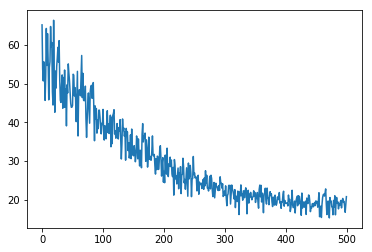

In [8]:
# Visualize the Loss
plt.plot(list(range(len(loss_vals))),loss_vals)
plt.show()

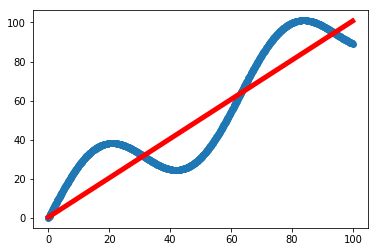

In [9]:
# Visualize the Predictions
plt.scatter(X_data,y_data)
plt.plot(X_data,X_data*trained_weight + trained_bias,c = 'r', linewidth = 5.0)
plt.show()